I did not run this again when moving into the github repo for the paper so might need to update paths appropriately.

folder 2022_07_12_N4av_noneq_refine with results is in clustersearch and magic-universalb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys,os
sys.path.append('../../../work2/shared/utilsGRF')
sys.path.append("../bin")
import BoundaryFinder as BF
import AnalyseBoundarysearch
import pandas as pd

import N4av_noneq_25, N4av_noneq_100
from scipy.interpolate import interp1d

def plot_hillline(ax,nmax=1,colordict=None,textonly=0):
    nrange=np.arange(1.8,nmax+0.2,0.1)
    hillline=np.vstack([BF.position_steepness_hill(n) for n in nrange])
    #fig,ax=plt.subplots(1,1,figsize=(5,5))
    ax.plot(hillline[:,0],hillline[:,1],color='gray',linestyle='--',label='Hill line')
    for n in range(2,nmax):
        ph,sh=BF.position_steepness_hill(n)
        if colordict is None:
            color="gray"
        else:
            color=colordict[n]
        ax.scatter(ph,sh,color=color,marker="x")
        if textonly==0:
            ax.text(ph*1.03,sh*0.97,'n=%d'%n,color=color)
        else:
            if textonly==n:
                ax.text(ph*1.03,sh*0.97,'n=%d'%n,color=color)
    #ax.legend()
    #ax.set_xlim(0.499,1.2)
    #ax.set_xlabel('position')
    #ax.set_ylabel('steepness')
    return ax

def get_x05(f,xvals):
    #first get midpoint
    min_=np.min(f)
    max_=np.max(f)
    midpoint=min_+0.5*(max_-min_)
    #print(f)
    #then get points around x05
    x05=xvals[np.where(f>=midpoint)[0][0]]
    return x05


def calculate_ps_fromnumerics_doublecheck_interpolate_100(pars=None,n1=75,n2=75,Hill=False,nH=2):
    
    xvals=np.logspace(-60,60,n1)
    f=np.zeros(n1)
    for x_ in range(n1):
        if Hill:
            f[x_]=(xvals[x_]**nH)/(1+xvals[x_]**nH)
        else:
            f[x_]=N4av_noneq_100.getGRFval(pars,xvals[x_])
    xint=np.logspace(-60,60,100000)
    intfunc=interp1d(xvals,f)
    fint=intfunc(xint)
    x05=get_x05(fint,xint)
    xvals=np.logspace(np.log10(0.0001*x05),np.log10(1000*x05),n2)
    #xvals=np.logspace(-3,3,n2)
    f=np.zeros(n2)
    for x_ in range(n2):
        if Hill:
            f[x_]=(xvals[x_]**nH)/(1+xvals[x_]**nH)
        else:
            f[x_]=N4av_noneq_100.getGRFval(pars,xvals[x_])
    xint=np.logspace(np.log10(xvals.min()),np.log10(xvals.max()),100000)
    intfunc=interp1d(xvals,f)
    fint=intfunc(xint)
    x05=get_x05(fint,xint)
    #print(x05)
    derivative=np.diff(fint)/np.diff(xint)
    argmax=np.argmax(np.abs(derivative))
    pos=xint[argmax]/x05
    stp=np.abs(derivative[argmax])*x05
    return [pos,stp,x05,xvals,f,xint,fint]

In [2]:
name_ashape="ashape_N4univ" 
date="2022_1_2"  #substitute by the new one with all region covered
plim=3
foldernew="./ashapes"   
ashape=np.load(os.path.join(foldernew,"%s_%d_%s.npy"%(name_ashape,plim,date)))

pos_ar=np.arange(0.7,1.1,0.005)
stp_ar=np.arange(0.8,1.2,0.005)
mat=np.load("N4avnoneq_space_cont_out/mat_N4avnoneq_space_cont_12.npy")
mat_pars=np.load("N4avnoneq_space_cont_out/mat_pars_N4avnoneq_space_cont_12.npy")


In [3]:
len(mat),len(mat[0])

(80, 81)

In [ ]:
1 matrix= 240 jobs
now I have 12 matrix per grid
and 3 grids

grid: i//2880
matrix: i//12

In [21]:
total=240*36
print(total)

8640


In [30]:
8640/3

2880.0

In [37]:
for i in range(total):
    print(i//2880,i//(12*240),i//3, i%3)

0 0 0 0
0 0 0 1
0 0 0 2
0 0 1 0
0 0 1 1
0 0 1 2
0 0 2 0
0 0 2 1
0 0 2 2
0 0 3 0
0 0 3 1
0 0 3 2
0 0 4 0
0 0 4 1
0 0 4 2
0 0 5 0
0 0 5 1
0 0 5 2
0 0 6 0
0 0 6 1
0 0 6 2
0 0 7 0
0 0 7 1
0 0 7 2
0 0 8 0
0 0 8 1
0 0 8 2
0 0 9 0
0 0 9 1
0 0 9 2
0 0 10 0
0 0 10 1
0 0 10 2
0 0 11 0
0 0 11 1
0 0 11 2
0 0 12 0
0 0 12 1
0 0 12 2
0 0 13 0
0 0 13 1
0 0 13 2
0 0 14 0
0 0 14 1
0 0 14 2
0 0 15 0
0 0 15 1
0 0 15 2
0 0 16 0
0 0 16 1
0 0 16 2
0 0 17 0
0 0 17 1
0 0 17 2
0 0 18 0
0 0 18 1
0 0 18 2
0 0 19 0
0 0 19 1
0 0 19 2
0 0 20 0
0 0 20 1
0 0 20 2
0 0 21 0
0 0 21 1
0 0 21 2
0 0 22 0
0 0 22 1
0 0 22 2
0 0 23 0
0 0 23 1
0 0 23 2
0 0 24 0
0 0 24 1
0 0 24 2
0 0 25 0
0 0 25 1
0 0 25 2
0 0 26 0
0 0 26 1
0 0 26 2
0 0 27 0
0 0 27 1
0 0 27 2
0 0 28 0
0 0 28 1
0 0 28 2
0 0 29 0
0 0 29 1
0 0 29 2
0 0 30 0
0 0 30 1
0 0 30 2
0 0 31 0
0 0 31 1
0 0 31 2
0 0 32 0
0 0 32 1
0 0 32 2
0 0 33 0
0 0 33 1
0 0 33 2
0 0 34 0
0 0 34 1
0 0 34 2
0 0 35 0
0 0 35 1
0 0 35 2
0 0 36 0
0 0 36 1
0 0 36 2
0 0 37 0
0 0 37 1
0 0 37 2
0 0 

0 0 305 1
0 0 305 2
0 0 306 0
0 0 306 1
0 0 306 2
0 0 307 0
0 0 307 1
0 0 307 2
0 0 308 0
0 0 308 1
0 0 308 2
0 0 309 0
0 0 309 1
0 0 309 2
0 0 310 0
0 0 310 1
0 0 310 2
0 0 311 0
0 0 311 1
0 0 311 2
0 0 312 0
0 0 312 1
0 0 312 2
0 0 313 0
0 0 313 1
0 0 313 2
0 0 314 0
0 0 314 1
0 0 314 2
0 0 315 0
0 0 315 1
0 0 315 2
0 0 316 0
0 0 316 1
0 0 316 2
0 0 317 0
0 0 317 1
0 0 317 2
0 0 318 0
0 0 318 1
0 0 318 2
0 0 319 0
0 0 319 1
0 0 319 2
0 0 320 0
0 0 320 1
0 0 320 2
0 0 321 0
0 0 321 1
0 0 321 2
0 0 322 0
0 0 322 1
0 0 322 2
0 0 323 0
0 0 323 1
0 0 323 2
0 0 324 0
0 0 324 1
0 0 324 2
0 0 325 0
0 0 325 1
0 0 325 2
0 0 326 0
0 0 326 1
0 0 326 2
0 0 327 0
0 0 327 1
0 0 327 2
0 0 328 0
0 0 328 1
0 0 328 2
0 0 329 0
0 0 329 1
0 0 329 2
0 0 330 0
0 0 330 1
0 0 330 2
0 0 331 0
0 0 331 1
0 0 331 2
0 0 332 0
0 0 332 1
0 0 332 2
0 0 333 0
0 0 333 1
0 0 333 2
0 0 334 0
0 0 334 1
0 0 334 2
0 0 335 0
0 0 335 1
0 0 335 2
0 0 336 0
0 0 336 1
0 0 336 2
0 0 337 0
0 0 337 1
0 0 337 2
0 0 338 0
0 0 338 1


0 0 638 1
0 0 638 2
0 0 639 0
0 0 639 1
0 0 639 2
0 0 640 0
0 0 640 1
0 0 640 2
0 0 641 0
0 0 641 1
0 0 641 2
0 0 642 0
0 0 642 1
0 0 642 2
0 0 643 0
0 0 643 1
0 0 643 2
0 0 644 0
0 0 644 1
0 0 644 2
0 0 645 0
0 0 645 1
0 0 645 2
0 0 646 0
0 0 646 1
0 0 646 2
0 0 647 0
0 0 647 1
0 0 647 2
0 0 648 0
0 0 648 1
0 0 648 2
0 0 649 0
0 0 649 1
0 0 649 2
0 0 650 0
0 0 650 1
0 0 650 2
0 0 651 0
0 0 651 1
0 0 651 2
0 0 652 0
0 0 652 1
0 0 652 2
0 0 653 0
0 0 653 1
0 0 653 2
0 0 654 0
0 0 654 1
0 0 654 2
0 0 655 0
0 0 655 1
0 0 655 2
0 0 656 0
0 0 656 1
0 0 656 2
0 0 657 0
0 0 657 1
0 0 657 2
0 0 658 0
0 0 658 1
0 0 658 2
0 0 659 0
0 0 659 1
0 0 659 2
0 0 660 0
0 0 660 1
0 0 660 2
0 0 661 0
0 0 661 1
0 0 661 2
0 0 662 0
0 0 662 1
0 0 662 2
0 0 663 0
0 0 663 1
0 0 663 2
0 0 664 0
0 0 664 1
0 0 664 2
0 0 665 0
0 0 665 1
0 0 665 2
0 0 666 0
0 0 666 1
0 0 666 2
0 0 667 0
0 0 667 1
0 0 667 2
0 0 668 0
0 0 668 1
0 0 668 2
0 0 669 0
0 0 669 1
0 0 669 2
0 0 670 0
0 0 670 1
0 0 670 2
0 0 671 0
0 0 671 1


1 1 971 2
1 1 972 0
1 1 972 1
1 1 972 2
1 1 973 0
1 1 973 1
1 1 973 2
1 1 974 0
1 1 974 1
1 1 974 2
1 1 975 0
1 1 975 1
1 1 975 2
1 1 976 0
1 1 976 1
1 1 976 2
1 1 977 0
1 1 977 1
1 1 977 2
1 1 978 0
1 1 978 1
1 1 978 2
1 1 979 0
1 1 979 1
1 1 979 2
1 1 980 0
1 1 980 1
1 1 980 2
1 1 981 0
1 1 981 1
1 1 981 2
1 1 982 0
1 1 982 1
1 1 982 2
1 1 983 0
1 1 983 1
1 1 983 2
1 1 984 0
1 1 984 1
1 1 984 2
1 1 985 0
1 1 985 1
1 1 985 2
1 1 986 0
1 1 986 1
1 1 986 2
1 1 987 0
1 1 987 1
1 1 987 2
1 1 988 0
1 1 988 1
1 1 988 2
1 1 989 0
1 1 989 1
1 1 989 2
1 1 990 0
1 1 990 1
1 1 990 2
1 1 991 0
1 1 991 1
1 1 991 2
1 1 992 0
1 1 992 1
1 1 992 2
1 1 993 0
1 1 993 1
1 1 993 2
1 1 994 0
1 1 994 1
1 1 994 2
1 1 995 0
1 1 995 1
1 1 995 2
1 1 996 0
1 1 996 1
1 1 996 2
1 1 997 0
1 1 997 1
1 1 997 2
1 1 998 0
1 1 998 1
1 1 998 2
1 1 999 0
1 1 999 1
1 1 999 2
1 1 1000 0
1 1 1000 1
1 1 1000 2
1 1 1001 0
1 1 1001 1
1 1 1001 2
1 1 1002 0
1 1 1002 1
1 1 1002 2
1 1 1003 0
1 1 1003 1
1 1 1003 2
1 1 1004 0
1 1 100

1 1 1305 0
1 1 1305 1
1 1 1305 2
1 1 1306 0
1 1 1306 1
1 1 1306 2
1 1 1307 0
1 1 1307 1
1 1 1307 2
1 1 1308 0
1 1 1308 1
1 1 1308 2
1 1 1309 0
1 1 1309 1
1 1 1309 2
1 1 1310 0
1 1 1310 1
1 1 1310 2
1 1 1311 0
1 1 1311 1
1 1 1311 2
1 1 1312 0
1 1 1312 1
1 1 1312 2
1 1 1313 0
1 1 1313 1
1 1 1313 2
1 1 1314 0
1 1 1314 1
1 1 1314 2
1 1 1315 0
1 1 1315 1
1 1 1315 2
1 1 1316 0
1 1 1316 1
1 1 1316 2
1 1 1317 0
1 1 1317 1
1 1 1317 2
1 1 1318 0
1 1 1318 1
1 1 1318 2
1 1 1319 0
1 1 1319 1
1 1 1319 2
1 1 1320 0
1 1 1320 1
1 1 1320 2
1 1 1321 0
1 1 1321 1
1 1 1321 2
1 1 1322 0
1 1 1322 1
1 1 1322 2
1 1 1323 0
1 1 1323 1
1 1 1323 2
1 1 1324 0
1 1 1324 1
1 1 1324 2
1 1 1325 0
1 1 1325 1
1 1 1325 2
1 1 1326 0
1 1 1326 1
1 1 1326 2
1 1 1327 0
1 1 1327 1
1 1 1327 2
1 1 1328 0
1 1 1328 1
1 1 1328 2
1 1 1329 0
1 1 1329 1
1 1 1329 2
1 1 1330 0
1 1 1330 1
1 1 1330 2
1 1 1331 0
1 1 1331 1
1 1 1331 2
1 1 1332 0
1 1 1332 1
1 1 1332 2
1 1 1333 0
1 1 1333 1
1 1 1333 2
1 1 1334 0
1 1 1334 1
1 1 1334 2
1 1 1335 0

1 1 1638 1
1 1 1638 2
1 1 1639 0
1 1 1639 1
1 1 1639 2
1 1 1640 0
1 1 1640 1
1 1 1640 2
1 1 1641 0
1 1 1641 1
1 1 1641 2
1 1 1642 0
1 1 1642 1
1 1 1642 2
1 1 1643 0
1 1 1643 1
1 1 1643 2
1 1 1644 0
1 1 1644 1
1 1 1644 2
1 1 1645 0
1 1 1645 1
1 1 1645 2
1 1 1646 0
1 1 1646 1
1 1 1646 2
1 1 1647 0
1 1 1647 1
1 1 1647 2
1 1 1648 0
1 1 1648 1
1 1 1648 2
1 1 1649 0
1 1 1649 1
1 1 1649 2
1 1 1650 0
1 1 1650 1
1 1 1650 2
1 1 1651 0
1 1 1651 1
1 1 1651 2
1 1 1652 0
1 1 1652 1
1 1 1652 2
1 1 1653 0
1 1 1653 1
1 1 1653 2
1 1 1654 0
1 1 1654 1
1 1 1654 2
1 1 1655 0
1 1 1655 1
1 1 1655 2
1 1 1656 0
1 1 1656 1
1 1 1656 2
1 1 1657 0
1 1 1657 1
1 1 1657 2
1 1 1658 0
1 1 1658 1
1 1 1658 2
1 1 1659 0
1 1 1659 1
1 1 1659 2
1 1 1660 0
1 1 1660 1
1 1 1660 2
1 1 1661 0
1 1 1661 1
1 1 1661 2
1 1 1662 0
1 1 1662 1
1 1 1662 2
1 1 1663 0
1 1 1663 1
1 1 1663 2
1 1 1664 0
1 1 1664 1
1 1 1664 2
1 1 1665 0
1 1 1665 1
1 1 1665 2
1 1 1666 0
1 1 1666 1
1 1 1666 2
1 1 1667 0
1 1 1667 1
1 1 1667 2
1 1 1668 0
1 1 1668 1

2 2 1971 1
2 2 1971 2
2 2 1972 0
2 2 1972 1
2 2 1972 2
2 2 1973 0
2 2 1973 1
2 2 1973 2
2 2 1974 0
2 2 1974 1
2 2 1974 2
2 2 1975 0
2 2 1975 1
2 2 1975 2
2 2 1976 0
2 2 1976 1
2 2 1976 2
2 2 1977 0
2 2 1977 1
2 2 1977 2
2 2 1978 0
2 2 1978 1
2 2 1978 2
2 2 1979 0
2 2 1979 1
2 2 1979 2
2 2 1980 0
2 2 1980 1
2 2 1980 2
2 2 1981 0
2 2 1981 1
2 2 1981 2
2 2 1982 0
2 2 1982 1
2 2 1982 2
2 2 1983 0
2 2 1983 1
2 2 1983 2
2 2 1984 0
2 2 1984 1
2 2 1984 2
2 2 1985 0
2 2 1985 1
2 2 1985 2
2 2 1986 0
2 2 1986 1
2 2 1986 2
2 2 1987 0
2 2 1987 1
2 2 1987 2
2 2 1988 0
2 2 1988 1
2 2 1988 2
2 2 1989 0
2 2 1989 1
2 2 1989 2
2 2 1990 0
2 2 1990 1
2 2 1990 2
2 2 1991 0
2 2 1991 1
2 2 1991 2
2 2 1992 0
2 2 1992 1
2 2 1992 2
2 2 1993 0
2 2 1993 1
2 2 1993 2
2 2 1994 0
2 2 1994 1
2 2 1994 2
2 2 1995 0
2 2 1995 1
2 2 1995 2
2 2 1996 0
2 2 1996 1
2 2 1996 2
2 2 1997 0
2 2 1997 1
2 2 1997 2
2 2 1998 0
2 2 1998 1
2 2 1998 2
2 2 1999 0
2 2 1999 1
2 2 1999 2
2 2 2000 0
2 2 2000 1
2 2 2000 2
2 2 2001 0
2 2 2001 1

2 2 2263 0
2 2 2263 1
2 2 2263 2
2 2 2264 0
2 2 2264 1
2 2 2264 2
2 2 2265 0
2 2 2265 1
2 2 2265 2
2 2 2266 0
2 2 2266 1
2 2 2266 2
2 2 2267 0
2 2 2267 1
2 2 2267 2
2 2 2268 0
2 2 2268 1
2 2 2268 2
2 2 2269 0
2 2 2269 1
2 2 2269 2
2 2 2270 0
2 2 2270 1
2 2 2270 2
2 2 2271 0
2 2 2271 1
2 2 2271 2
2 2 2272 0
2 2 2272 1
2 2 2272 2
2 2 2273 0
2 2 2273 1
2 2 2273 2
2 2 2274 0
2 2 2274 1
2 2 2274 2
2 2 2275 0
2 2 2275 1
2 2 2275 2
2 2 2276 0
2 2 2276 1
2 2 2276 2
2 2 2277 0
2 2 2277 1
2 2 2277 2
2 2 2278 0
2 2 2278 1
2 2 2278 2
2 2 2279 0
2 2 2279 1
2 2 2279 2
2 2 2280 0
2 2 2280 1
2 2 2280 2
2 2 2281 0
2 2 2281 1
2 2 2281 2
2 2 2282 0
2 2 2282 1
2 2 2282 2
2 2 2283 0
2 2 2283 1
2 2 2283 2
2 2 2284 0
2 2 2284 1
2 2 2284 2
2 2 2285 0
2 2 2285 1
2 2 2285 2
2 2 2286 0
2 2 2286 1
2 2 2286 2
2 2 2287 0
2 2 2287 1
2 2 2287 2
2 2 2288 0
2 2 2288 1
2 2 2288 2
2 2 2289 0
2 2 2289 1
2 2 2289 2
2 2 2290 0
2 2 2290 1
2 2 2290 2
2 2 2291 0
2 2 2291 1
2 2 2291 2
2 2 2292 0
2 2 2292 1
2 2 2292 2
2 2 2293 0

2 2 2596 1
2 2 2596 2
2 2 2597 0
2 2 2597 1
2 2 2597 2
2 2 2598 0
2 2 2598 1
2 2 2598 2
2 2 2599 0
2 2 2599 1
2 2 2599 2
2 2 2600 0
2 2 2600 1
2 2 2600 2
2 2 2601 0
2 2 2601 1
2 2 2601 2
2 2 2602 0
2 2 2602 1
2 2 2602 2
2 2 2603 0
2 2 2603 1
2 2 2603 2
2 2 2604 0
2 2 2604 1
2 2 2604 2
2 2 2605 0
2 2 2605 1
2 2 2605 2
2 2 2606 0
2 2 2606 1
2 2 2606 2
2 2 2607 0
2 2 2607 1
2 2 2607 2
2 2 2608 0
2 2 2608 1
2 2 2608 2
2 2 2609 0
2 2 2609 1
2 2 2609 2
2 2 2610 0
2 2 2610 1
2 2 2610 2
2 2 2611 0
2 2 2611 1
2 2 2611 2
2 2 2612 0
2 2 2612 1
2 2 2612 2
2 2 2613 0
2 2 2613 1
2 2 2613 2
2 2 2614 0
2 2 2614 1
2 2 2614 2
2 2 2615 0
2 2 2615 1
2 2 2615 2
2 2 2616 0
2 2 2616 1
2 2 2616 2
2 2 2617 0
2 2 2617 1
2 2 2617 2
2 2 2618 0
2 2 2618 1
2 2 2618 2
2 2 2619 0
2 2 2619 1
2 2 2619 2
2 2 2620 0
2 2 2620 1
2 2 2620 2
2 2 2621 0
2 2 2621 1
2 2 2621 2
2 2 2622 0
2 2 2622 1
2 2 2622 2
2 2 2623 0
2 2 2623 1
2 2 2623 2
2 2 2624 0
2 2 2624 1
2 2 2624 2
2 2 2625 0
2 2 2625 1
2 2 2625 2
2 2 2626 0
2 2 2626 1

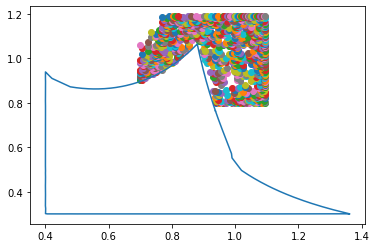

In [4]:
plt.plot(ashape[0],ashape[1])

for i in range(len(mat)):
    for j in range(len(mat[0])):
        if mat[i,j]>0:
            stp=stp_ar[i]
            pos=pos_ar[j]
            
            idxs_x=np.where(((np.abs(ashape[0]-pos)<0.01)))[0]
            outside=True
            for idx in idxs_x:
                stp_ashape=ashape[1][idx]
                if stp_ashape>stp:
                    outside=False
            if outside:    
                plt.scatter(pos,stp)
            
#plt.xlim(0.75,1)
#plt.ylim(0.9,1.2)
plt.show()

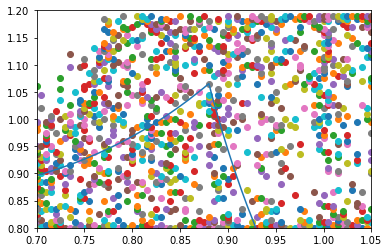

In [5]:
plt.plot(ashape[0],ashape[1])

for i in range(len(mat)):
    for j in range(len(mat[0])):
        if mat[i,j]>0:
            stp=stp_ar[i]
            pos=pos_ar[j]
                
            plt.scatter(pos,stp)
            
plt.xlim(0.7,1.05)
plt.ylim(0.8,1.2)
plt.show()

In [6]:
#reevaluate points with higher n (calculated with n=50). First I started doing this locally but then I moved to cluster because it takes a while for high enough n2.
if False:
    new=[]
    old=[]
    for i in range(len(mat)):
        print(i,end=",")
        for j in range(len(mat[0])):
            if mat[i,j]>0:
                pos=pos_ar[j]
                stp=stp_ar[i]
                #idxs_x=np.where(((np.abs(ashape[0]-pos)<0.01)))[0]
                #outside=True
                #for idx in idxs_x:
                #    stp_ashape=ashape[1][idx]
                #    if stp_ashape>stp:
                #        outside=False
                if True: #outside:
                    pars=mat_pars[i,j]
                    result=calculate_ps_fromnumerics_doublecheck_interpolate_100(pars,n1=100,n2=100)
                    #newpos=result[0]
                    #newstp=result[1]
                    new.append([result,pars])
                    old.append([[pos,stp],pars])


Read results from cluster refinement:

In [6]:
folder="/Users/rosamartinezcorral/Dropbox (HMS)/data/2021_12_boundaries/2022_07_12_N4av_noneq_refine"
files=[x for x in os.listdir(folder) if x.startswith("out")]
print(len(files))
allpars=[]
allxvals=[]
allfvals=[]
allresults=[]
for f in files:
    fullf=os.path.join(folder,f)
    fh=open(fullf,"r")
    lines=fh.readlines()
    lines=[np.array(list(map(float,x.split(",")))) for x in lines]
    pars=lines[0]
    result=lines[1]
    xvals=lines[2]
    fvals=lines[3]
    allpars.append(pars)
    allxvals.append(xvals)
    allfvals.append(fvals)
    allresults.append(result)
    
    
        

1385


In [7]:
allresults=np.vstack(allresults)
pos=allresults[:,0]
stp=allresults[:,1]

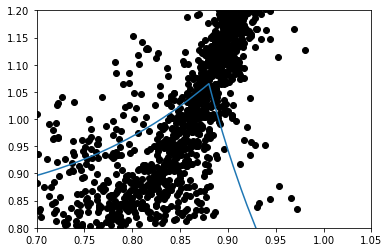

In [8]:

plt.plot(ashape[0],ashape[1])

plt.scatter(pos,stp,color="k")
plt.xlim(0.7,1.05)
plt.ylim(0.8,1.2)
plt.show()


Prepare 3 grids for which to run boundaries. Given that the calculations are so slow, this is a way to speed up the process.

In [2]:
step=0.005
stp_ar_grid1=np.arange(1,1.2+step,step)
pos_ar_grid1=np.arange(0.7,0.84+step,step)
print(len(stp_ar_grid1))

stp_ar_grid2=np.arange(1,1.2+step,step)
pos_ar_grid2=np.arange(0.9,1.05+step,step)
print(len(stp_ar_grid2))

stp_ar_grid3=np.arange(0.8,1.+step,step)
pos_ar_grid3=np.arange(0.93,1.05+step,step)
print(len(stp_ar_grid3))


41
41
41


In [18]:
grid1=np.zeros((len(stp_ar_grid1),len(pos_ar_grid1)))
grid1pars=np.zeros((len(stp_ar_grid1),len(pos_ar_grid1),64))
grid2=np.zeros((len(stp_ar_grid2),len(pos_ar_grid2)))
grid2pars=np.zeros((len(stp_ar_grid2),len(pos_ar_grid2),64))
grid3=np.zeros((len(stp_ar_grid3),len(pos_ar_grid3)))
grid3pars=np.zeros((len(stp_ar_grid3),len(pos_ar_grid3),64))
for i in range(len(allresults)):
    pos,stp,x05=allresults[i]
    pars=allpars[i]
    found=False
    if pos>=pos_ar_grid1[0] and pos<pos_ar_grid1[-1] and stp>=stp_ar_grid1[0] and stp<stp_ar_grid1[-1]:
        mat=grid1
        matpars=grid1pars
        idxp=np.where(pos>=pos_ar_grid1)[0][-1]
        idxs=np.where(stp>=stp_ar_grid1)[0][-1]
        found=True
    elif pos>=pos_ar_grid2[0] and pos<pos_ar_grid2[-1] and stp>=stp_ar_grid2[0] and stp<stp_ar_grid2[-1]:
        mat=grid2
        matpars=grid2pars
        idxp=np.where(pos>=pos_ar_grid2)[0][-1]
        idxs=np.where(stp>=stp_ar_grid2)[0][-1]
        found=True
    elif pos>=pos_ar_grid3[0] and pos<pos_ar_grid3[-1] and stp>=stp_ar_grid3[0] and stp<stp_ar_grid3[-1]:
        mat=grid3
        matpars=grid3pars
        idxp=np.where(pos>=pos_ar_grid3)[0][-1]
        idxs=np.where(stp>=stp_ar_grid3)[0][-1]
        found=True
    if found:
        mat[idxs,idxp]=1
        matpars[idxs,idxp]=pars
            

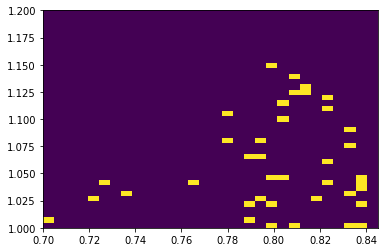

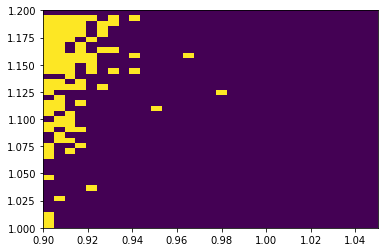

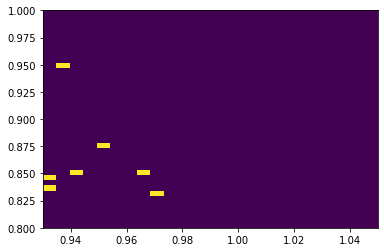

In [19]:
plt.imshow(grid1,origin="lower",aspect="auto",extent=[pos_ar_grid1[0],pos_ar_grid1[-1],stp_ar_grid1[0],stp_ar_grid1[-1]])
plt.show()
plt.imshow(grid2,origin="lower",aspect="auto",extent=[pos_ar_grid2[0],pos_ar_grid2[-1],stp_ar_grid2[0],stp_ar_grid2[-1]])
plt.show()

plt.imshow(grid3,origin="lower",aspect="auto",extent=[pos_ar_grid3[0],pos_ar_grid3[-1],stp_ar_grid3[0],stp_ar_grid3[-1]])
plt.show()

In [20]:
np.save("N4avneq_mat_grid1.npy",grid1)
np.save("N4avneq_matpars_grid1.npy",grid1pars)

np.save("N4avneq_mat_grid2.npy",grid2)
np.save("N4avneq_matpars_grid2.npy",grid2pars)

np.save("N4avneq_mat_grid3.npy",grid3)
np.save("N4avneq_matpars_grid3.npy",grid3pars)


In [ ]:
Each grid is expanded in the cluster using the boundary finding code:
    2022_07_12_N4av_noneq_b_g1
    2022_07_12_N4av_noneq_b_g2
    2022_07_12_N4av_noneq_b_g3

After the boundaries were run for 15 days, I then took the results and refined them, also in the cluster.
I am not saving the results of each individual boundary output, only the refined results.
Refinement was done in 2022_07_12_refine_afterbsearch. This is then read in Fig5_C_3_pointsnoneqav4_fromrefinementcluster from which the final points shown in the paper figure are obtained.